In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

# Loading Dataset
df = pd.read_csv("hmnist_28_28_RGB.csv")
meta_data = pd.read_csv("HAM10000_metadata.csv")
# Getting Labels
all_labels = meta_data['dx']
labels = meta_data['dx'].isin(['bcc', 'mel', 'akiec'])
image_name = meta_data['image_id']

df_without_label = df.drop(columns=['label'])
# print(f"{df_without_label=}")

pixel_columns = df_without_label.columns
# print(f"{pixel_columns=}")

cancer_count = sum(labels == True)
noncancer_count = sum(labels == False)
print("Cancer Instances:", cancer_count)
print("Non-Cancer Instances:", noncancer_count)
# df

Cancer Instances: 1954
Non-Cancer Instances: 8061


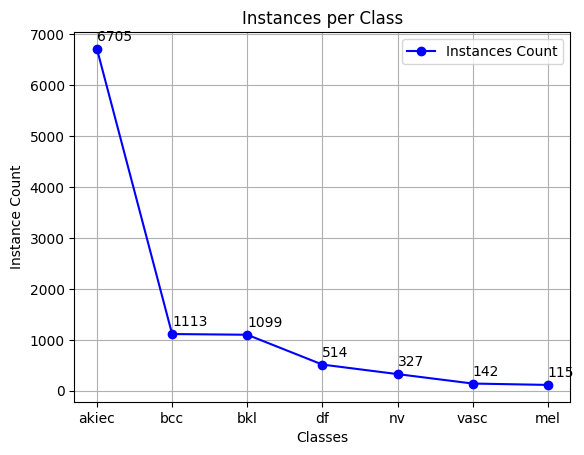

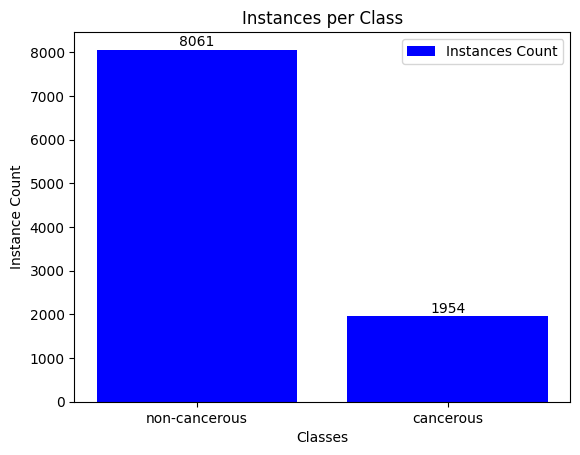

In [7]:
unique_classes_count = all_labels.value_counts()
unique_classes = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']
plt.plot(unique_classes,
         unique_classes_count, marker='o', linestyle='-', color='b', label='Instances Count')

for x_coord, y_coord in zip(unique_classes, unique_classes_count):
    plt.text(x_coord, y_coord+100, f'{y_coord}', ha='left', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Instance Count')
plt.title('Instances per Class')
plt.legend()
plt.grid(True)
plt.show()

unique_classes_count = [noncancer_count,cancer_count]
unique_classes = ['non-cancerous', 'cancerous']
plt.bar(unique_classes,
         [noncancer_count, cancer_count], color='b', label='Instances Count')

for x_coord, y_coord in zip(unique_classes, unique_classes_count):
    plt.text(x_coord, y_coord+20, f'{y_coord}', ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Instance Count')
plt.title('Instances per Class')
plt.legend()
plt.grid(False)
plt.show()


[9810 9647 9866  399 4155 2368 4887 1146 7162]
blue_values[-1]=array([170, 169, 174, 145, 172, 185, 171, 160, 173, 174, 201, 203, 189,
       194, 204, 208, 205, 202, 205, 219, 219, 216, 207, 201, 208, 189,
       145, 140], dtype=int64)
blue_values[-1]=array([159, 167, 165, 173, 177, 179, 182, 187, 184, 181, 175, 184, 188,
       186, 190, 186, 182, 180, 187, 188, 188, 180, 176, 172, 174, 170,
       161, 149], dtype=int64)
blue_values[-1]=array([119, 113, 130, 139, 138, 143, 136, 135, 139, 148, 146, 147, 146,
       149, 149, 148, 145, 141, 136, 145, 150, 152, 154, 153, 151, 147,
       145, 146], dtype=int64)
blue_values[-1]=array([191, 189, 190, 189, 186, 184, 179, 175, 185, 182, 183, 185, 184,
       196, 199, 192, 183, 183, 194, 195, 191, 190, 194, 191, 192, 188,
       188, 187], dtype=int64)
blue_values[-1]=array([168, 170, 177, 177, 176, 182, 184, 184, 186, 180, 166, 163, 177,
       179, 171, 167, 159, 152, 160, 163, 149, 155, 168, 174, 177, 179,
       178, 183], dtype=int64

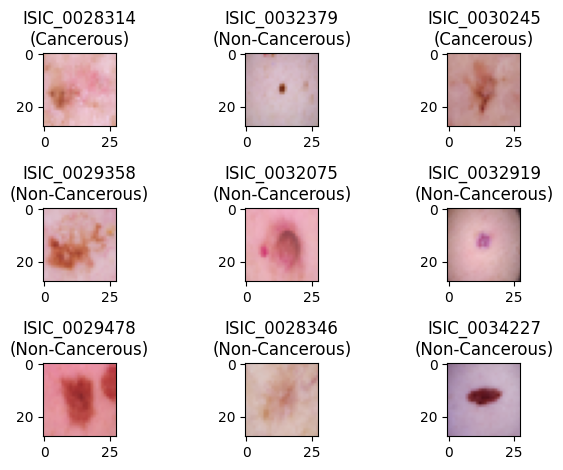

In [8]:
rows = 3
cols = 3
plotNo = 0


def plotImage(index):
    global plotNo
    plt.subplot(rows, cols, plotNo+1)
    value = df_without_label[pixel_columns][index:index+1].values[0]

    red_values = (value[0:2352:3]).reshape(28, 28)
    green_values = value[1:2352:3].reshape(28, 28)
    blue_values = value[2:2352:3].reshape(28, 28)
    print(f"{blue_values[-1]=}")

    rgb_image = np.stack([red_values, green_values, blue_values], axis=-1)

    plt.title(f"{image_name[index]}\n({'Cancerous' if labels[index] else 'Non-Cancerous'})")
    plt.imshow(rgb_image)
    plotNo += 1


stratified_splitter = StratifiedShuffleSplit(
    n_splits=1, test_size=9, random_state=56)

for train_index, test_index in stratified_splitter.split(df_without_label, labels):
    print(f"{test_index}")
    for index in test_index:
        plotImage(index)

plt.tight_layout()
plt.show()


In [9]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = [], [], [], []

for train_index, test_index in StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=56).split(df_without_label, labels):
    X_train, X_test, y_train, y_test = df_without_label.iloc[train_index], df_without_label.iloc[test_index], labels[train_index], labels[test_index]
# print(f"{train_index=}")
# print(f"{test_index=}")

def calc_Confusion_Matrix(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test, y_pred)


confusion_matrices = []
roc_auc_arr = []

In [10]:
confusion_matrices.append(calc_Confusion_Matrix(svm.SVC()))
display(confusion_matrices[0])


array([[1597,   15],
       [ 342,   49]], dtype=int64)

In [11]:
confusion_matrices.append(calc_Confusion_Matrix(RandomForestClassifier()))
display(confusion_matrices[1])


array([[1570,   42],
       [ 299,   92]], dtype=int64)

In [12]:
confusion_matrices.append(calc_Confusion_Matrix(LogisticRegression(max_iter = 3000)))
display(confusion_matrices[2])


c:\Users\Sonu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1377,  235],
       [ 255,  136]], dtype=int64)

In [13]:
confusion_matrices.append(calc_Confusion_Matrix(XGBClassifier()))
display(confusion_matrices[3])

array([[1529,   83],
       [ 250,  141]], dtype=int64)

In [14]:
# from sklearn.metrics import roc_auc_score

# models_1 = [svm.SVC(), RandomForestClassifier(), LogisticRegression(), XGBClassifier()]
# auc_roc_scores = []

# def auc_roc_score_r(models, X_test):
#     probs = models.predict_proba(X_test)
#     return probs

In [15]:
# auc_roc = roc_auc_score(y_test, auc_roc_score_r(svm.SVC(probability = True), X_test))
# auc_roc_scores.append(auc_roc)

In [16]:
# auc_roc = roc_auc_score(y_test, auc_roc_score_r(, X_test))
# auc_roc_scores.append(auc_roc)

In [17]:
# auc_roc = roc_auc_score(y_test, auc_roc_score_r(LogisticRegression(), X_test))
# auc_roc_scores.append(auc_roc)

In [18]:
# auc_roc = roc_auc_score(y_test, auc_roc_score_r(XGBClassifier(), X_test))
# auc_roc_scores.append(auc_roc)

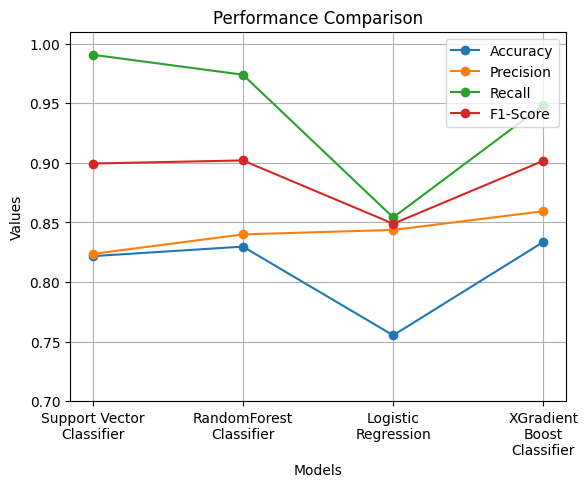

In [19]:
accuracies = [(score[0][0]+score[1][1])/(score[0][0]+score[0][1]+score[1][0]+score[1][1]) for score in confusion_matrices]
precisions = [score[0][0]/(score[0][0]+score[1][0]) for score in confusion_matrices]
recalls = [score[0][0]/(score[0][0]+score[0][1]) for score in confusion_matrices]
f1scores = [2*p*r/(p+r) for p,r  in zip(precisions, recalls)]
models = ['Support Vector\nClassifier', 'RandomForest\nClassifier', 'Logistic\nRegression', 'XGradient\nBoost\nClassifier']
plt.plot(models, accuracies, marker='o', linestyle='-', label ="Accuracy")
# def plot_labels(models, accuracies):
#     for x_coord, y_coord in zip(models, accuracies):
#         plt.text(x_coord, y_coord, "%.2f" % y_coord, ha='left', va='bottom')
# plot_labels(models, accuracies)
plt.plot(models, precisions, marker='o', linestyle='-', label ="Precision")
# plot_labels(models, precisions)
plt.plot(models, recalls, marker='o', linestyle='-', label ="Recall")
# plot_labels(models, recalls)
plt.plot(models, f1scores, marker='o', linestyle='-', label ="F1-Score")
# plot_labels(models, f1scores)
# plt.plot(models, auc_roc_scores, label ="AUC-ROC")
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Performance Comparison')
plt.legend(loc='upper right')
plt.ylim(0.7, 1.01)
plt.grid(True)
plt.show()